# Final Project 
Course: Fundamentals of ML
Build a ML model to help HR departament to predict and through this information they can create plans to reduce the employees churn rate

Question: Will employee quit the company?

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('data/modelagem_rh.csv')

In [5]:
df.shape

(14999, 10)

In [8]:
df.head()

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento,salario
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Proportion of employees that quit and not quit

In [46]:
df.saiu.value_counts()

0    11428
1     3571
Name: saiu, dtype: int64

In [20]:
proportion_in_percent = round((df.saiu.value_counts()/len(df)) * 100, 2)

([<matplotlib.axis.XTick at 0xcb5b5b0>, <matplotlib.axis.XTick at 0xcb5b598>],
 [Text(0, 0, 'Not quit'), Text(0, 0, 'Quit')])

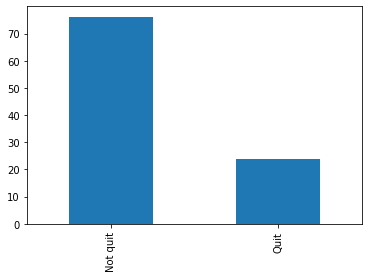

In [47]:
proportion_in_percent.plot(kind='bar')
plt.xticks((0,1), ('Not quit', 'Quit'))

Proportion of employees that quit and not quit by department

In [41]:
quit_notquit_department = pd.crosstab(df.departamento, df.saiu)
quit_notquit_department

saiu,0,1
departamento,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


In [38]:
total_per_departament = quit_notquit_department.sum(axis=1)
total_per_departament

departamento
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

In [48]:
round(quit_notquit_department.divide(total_per_departament, axis=0)*100,2)

saiu,0,1
departamento,,
IT,77.75,22.25
RandD,84.63,15.37
accounting,73.40,26.60
hr,70.91,29.09
management,85.56,14.44
marketing,76.34,23.66
product_mng,78.05,21.95
sales,75.51,24.49
support,75.10,24.90


Proportion of employees that quit and not quit by salary

In [51]:
quit_notquit_salary =  pd.crosstab(df.salario, df.saiu)
quit_notquit_salary

saiu,0,1
salario,,
high,1155,82
low,5144,2172
medium,5129,1317


In [53]:
total_salary = quit_notquit_salary.sum(axis=1)

In [56]:
porcent_salary = round(quit_notquit_salary.divide(total_salary, axis=0)*100,2)

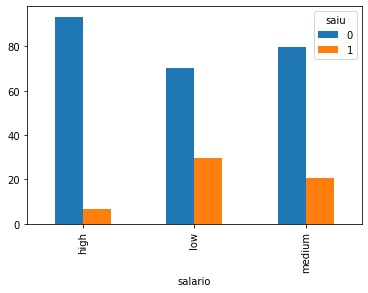

In [60]:
porcent_salary.plot(kind='bar')

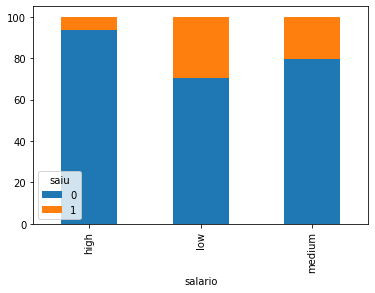

In [63]:
porcent_salary.plot(kind='bar', stacked=True)

Looking for null values and adjusting dtypes if it'd be necessary

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nivel_satisfacao    14978 non-null  float64
 1   ult_avaliacao       14999 non-null  float64
 2   num_projetos        14999 non-null  int64  
 3   media_horas_mes     14999 non-null  int64  
 4   tempo_empresa       14999 non-null  int64  
 5   aci_trabalho        14999 non-null  int64  
 6   saiu                14999 non-null  int64  
 7   promocao_ult_5anos  14999 non-null  int64  
 8   departamento        14999 non-null  object 
 9   salario             14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [65]:
df.isnull().sum()

nivel_satisfacao      21
ult_avaliacao          0
num_projetos           0
media_horas_mes        0
tempo_empresa          0
aci_trabalho           0
saiu                   0
promocao_ult_5anos     0
departamento           0
salario                0
dtype: int64

In [67]:
df.loc[df.nivel_satisfacao.isnull(), 'nivel_satisfacao'] = \
df.nivel_satisfacao.mean()

In [68]:
df.isnull().sum()

nivel_satisfacao      0
ult_avaliacao         0
num_projetos          0
media_horas_mes       0
tempo_empresa         0
aci_trabalho          0
saiu                  0
promocao_ult_5anos    0
departamento          0
salario               0
dtype: int64

In [69]:
new_df = pd.get_dummies(df, drop_first=True)

In [70]:
new_df.head()

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_hr,departamento_management,departamento_marketing,departamento_product_mng,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [93]:
pd.DataFrame([new_df.max(), new_df.min()], index=['max','min']).T

,max,min
nivel_satisfacao,1.0,0.09
ult_avaliacao,1.0,0.36
num_projetos,7.0,2.00
media_horas_mes,310.0,96.00
tempo_empresa,10.0,2.00
aci_trabalho,1.0,0.00
saiu,1.0,0.00
promocao_ult_5anos,1.0,0.00
departamento_RandD,1.0,0.00
departamento_accounting,1.0,0.00


Some columns like media_horas_mes have out of scale values. So I'm going to normalized that data

In [77]:
from sklearn import preprocessing

In [85]:
x = new_df.values

In [86]:
minmax = preprocessing.MinMaxScaler()

In [87]:
x_scaled = minmax.fit_transform(x)
x_scaled

array([[0.31868132, 0.265625  , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.78021978, 0.78125   , 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.02197802, 0.8125    , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.30769231, 0.265625  , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.02197802, 0.9375    , 0.8       , ..., 0.        , 1.        ,
        0.        ],
       [0.30769231, 0.25      , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [88]:
normalized_data = pd.DataFrame(x_scaled, columns=new_df.columns)

In [89]:
normalized_data.head()

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_hr,departamento_management,departamento_marketing,departamento_product_mng,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [92]:
pd.DataFrame([normalized_data.max(), normalized_data.min()], index=['max', 'min']).T

,max,min
nivel_satisfacao,1.0,0.0
ult_avaliacao,1.0,0.0
num_projetos,1.0,0.0
media_horas_mes,1.0,0.0
tempo_empresa,1.0,0.0
aci_trabalho,1.0,0.0
saiu,1.0,0.0
promocao_ult_5anos,1.0,0.0
departamento_RandD,1.0,0.0
departamento_accounting,1.0,0.0


Now all columns are normalized in the same scale

Creating models

In [102]:
features = list(normalized_data.columns)

In [103]:
features.remove('saiu')

In [104]:
X = normalized_data[features]

In [105]:
y = normalized_data['saiu']

In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [109]:
knn = KNeighborsClassifier(n_neighbors=3)
tree = DecisionTreeClassifier()

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [116]:
print(X_train.shape, X_test.shape)

(11999, 18) (3000, 18)


Applying knn

In [115]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [118]:
predicted_knn = knn.predict(X_test)

In [119]:
accuracy_score(y_test, predicted_knn)

0.9506666666666667

In [120]:
confusion_matrix(y_test, predicted_knn)

array([[2173,   94],
       [  54,  679]], dtype=int64)

In [121]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [122]:
predicted_tree = tree.predict(X_test)

In [123]:
accuracy_score(y_test, predicted_tree)

0.9826666666666667

In [124]:
confusion_matrix(y_test, predicted_tree)

array([[2240,   27],
       [  25,  708]], dtype=int64)

Testing Cross Validation

In [129]:
from sklearn.model_selection import cross_val_score

cv = num of folders

In [134]:
knn_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

In [135]:
knn_scores

array([0.96666667, 0.931     , 0.93433333, 0.95733333, 0.95165055])

In [136]:
scores.mean()

0.9481967767033457

In [137]:
scores.std()

0.013597545694866528

In [138]:
tree_scores = cross_val_score(tree, X, y, cv=5, scoring='accuracy')

In [139]:
tree_scores

array([0.98      , 0.96366667, 0.97066667, 0.991     , 0.97665889])

In [140]:
tree_scores.mean()

0.976398443925753

In [141]:
tree_scores.std()

0.00917819044143251

TreeClassifier had better performance in this analysis

Feature Importance

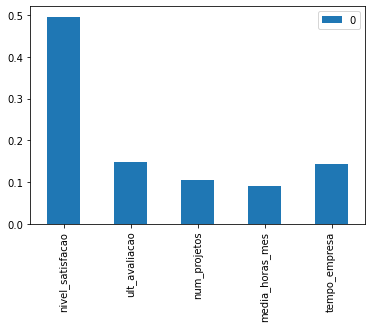

In [152]:
pd.DataFrame(tree.feature_importances_, index=X.columns).head().plot(kind='bar')

Storing the model in a pickle file to use in production

In [146]:
import pickle

In [147]:
tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [148]:
pickle.dump(tree, open('modelo_rg.pickle', 'wb'))

In [150]:
tree_saved = pickle.load(open('modelo_rg.pickle', 'rb'))

In [151]:
tree_saved.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])